In [83]:
%load_ext autoreload
%autoreload 2

from cuadripolos import Cuadripolo 
import numpy as np
from sympy import * 
import pandas as pd 
import matplotlib.pyplot as plt
#para scalar y comparar piolita
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams["axes.titlesize"] = 20

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tl por método finito 

In [84]:
tl_comsol = pd.read_csv('valores_tl.csv', delimiter = '                     ', header = None, engine = 'python')
tl_comsol.rename(columns = {0:'frequency', 1: 'tl'}, inplace = True)

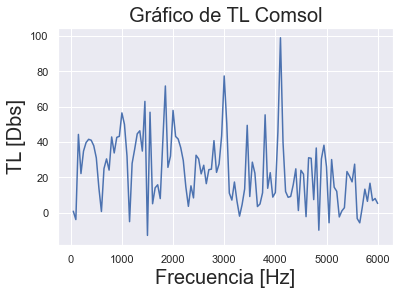

In [85]:
fig, ax = plt.subplots()
ax.plot(tl_comsol['frequency'], tl_comsol['tl'])
ax.set(xlabel='Frecuencia [Hz]', ylabel='TL [Dbs]',
       title='Gráfico de TL Comsol')
plt.show()

# Metodo Analítico por cuadripolos

## silenciador 1. 
silenciador:
- 1 Cámara de expansión
- 2 tubo
- 3 Cámara de expansión 
- 4 
 - 4.1 Extensión expansión
 - 4.2 Resonador de helmholtz

In [86]:
# 1 cámara
camara_s = np.pi*0.125*0.06
camara_s1 = camara_s2 = np.pi*(0.02**2)
camara_largo = 0.3
# 2 tubo 
tubo_s = tubo_s1 = np.pi*(0.02**2)
tubo_largo = 0.19 
# 3 camara 
camara_s = np.pi*0.126*0.06
camara_s1 = camara_s2 = np.pi*(0.02**2)
# 4 resonador + tubo de cuarto de onda: 
    #4.1 extensión_expansión
exten_expan_s1 = np.pi*(0.02**2)
exten_expan_s = np.pi*0.126*0.06
exten_expan_l = 0.01
    #4.2 rezonador de helmholtz 
helmholtz_s = helmholtz_s1 = (0.02**2)*np.pi
helmholtz_l= 0.01
helmholtz_v = 2*np.pi*0.126*0.06*0.19 - tubo_largo*tubo_s

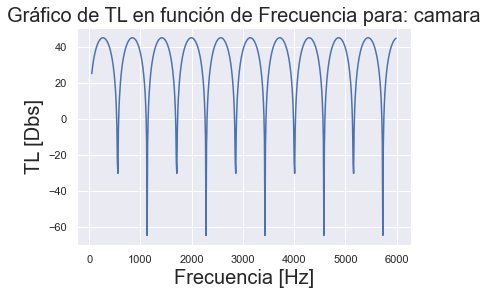

In [87]:
#camara
camara = Cuadripolo(s=camara_s, largo=camara_largo, s1=camara_s1, s2=camara_s2, tipo = 'camara')
camara.coeficientes()
camara.obtencion_tl()
camara.plot_tl()

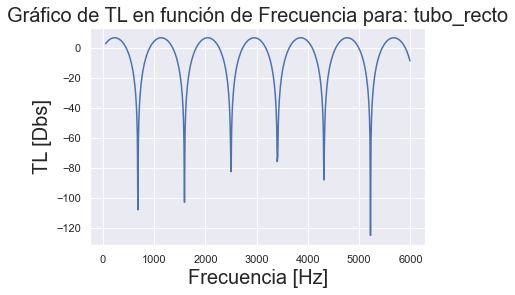

In [88]:
#tubo 
tubo = Cuadripolo(tubo_s, largo = tubo_largo, tipo = 'tubo_recto')
tubo.coeficientes()
tubo.obtencion_tl()
tubo.plot_tl()

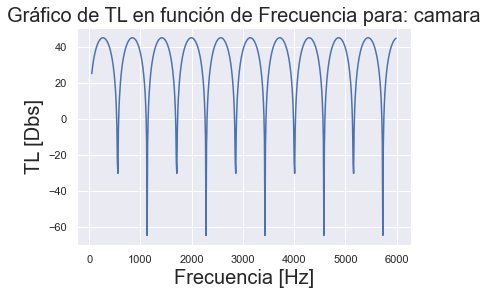

In [89]:
#camara 
camara_3 = Cuadripolo(s = camara_s, s1 = camara_s1, s2 = camara_s2, largo = camara_largo, tipo = 'camara')
camara_3.coeficientes()
camara_3.obtencion_tl()
camara_3.plot_tl()

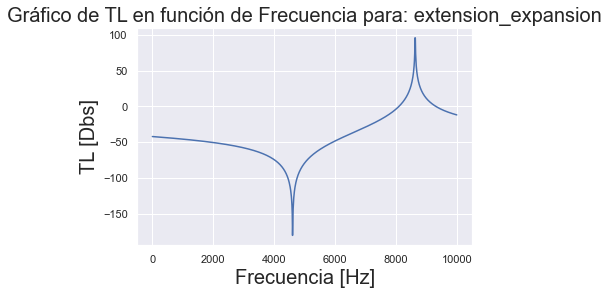

In [90]:
expansion_extension = Cuadripolo(s = exten_expan_s, s1=exten_expan_s1, largo=exten_expan_l, tipo = 'extension_expansion')
expansion_extension.coeficientes()
expansion_extension.obtencion_tl()
expansion_extension.plot_tl(values = np.arange(0, 10000, 10))

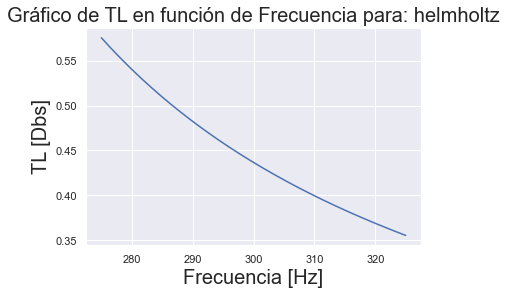

In [91]:
reso = Cuadripolo(s = helmholtz_s, s1 = helmholtz_s1, largo = helmholtz_l, tipo = 'helmholtz', vol = helmholtz_v)
reso.coeficientes()
reso.obtencion_tl()
reso.plot_tl(values = np.linspace(275, 325, 600))

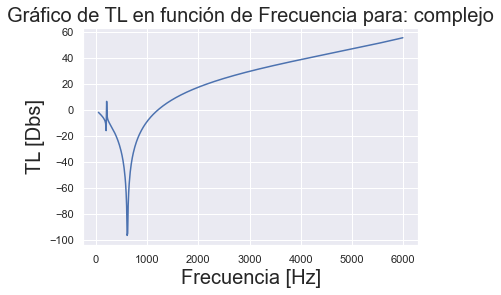

In [92]:
componente_4_5 = expansion_extension * reso
componente_4_5.s2 = np.pi*0.02**2
componente_4_5.s1 = np.pi*0.02**2
componente_4_5.obtencion_tl()
componente_4_5.plot_tl()

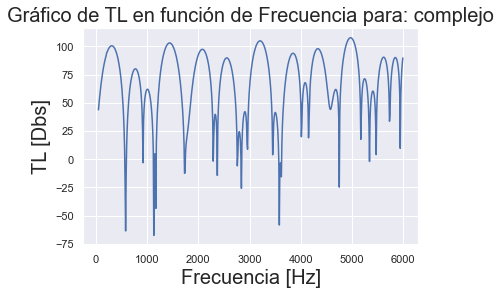

In [93]:
# total 
silenciador_total = camara * tubo * camara_3 * componente_4_5
silenciador_total.s1 = silenciador_total.s2 = np.pi * 0.02 ** 2
silenciador_total.obtencion_tl()
silenciador_total.plot_tl()

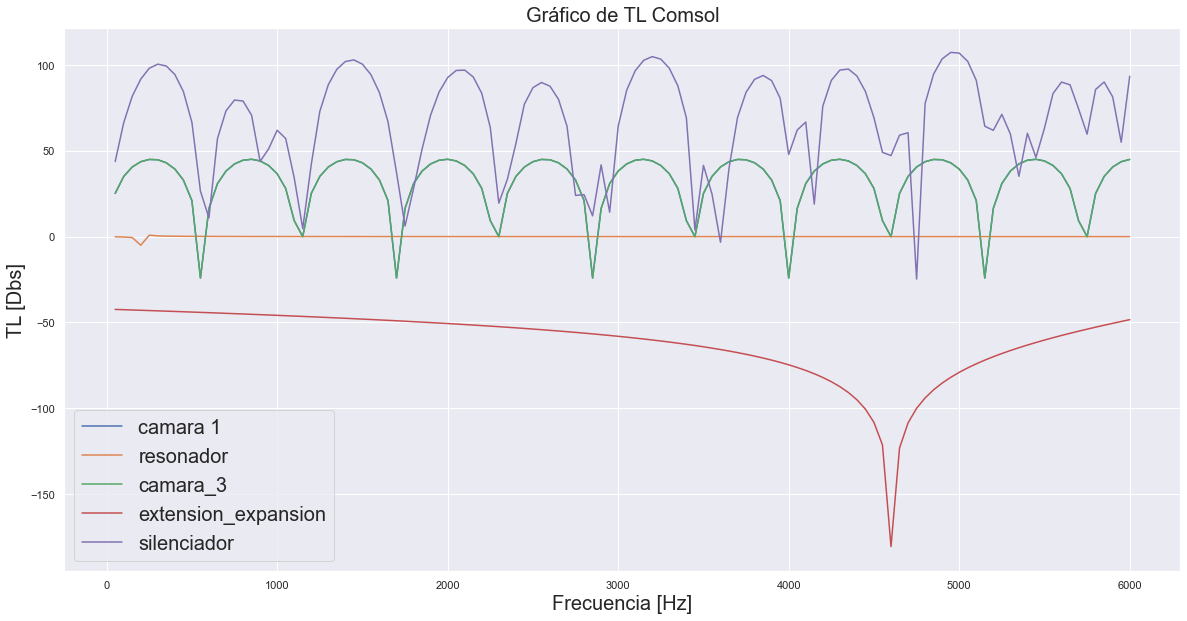

In [94]:
x = np.arange(50,6050,50)
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x, camara.tl_(x), label = 'camara 1')
ax.plot(x, reso.tl_(x), label = 'resonador')
ax.plot(x, camara_3.tl_(x), label = 'camara_3')
ax.plot(x, expansion_extension.tl_(x), label = 'extension_expansion')
ax.plot(x, silenciador_total.tl_(x), label = 'silenciador')
ax.set(xlabel='Frecuencia [Hz]', ylabel='TL [Dbs]',
       title='Gráfico de TL Comsol')
ax.legend(loc = 'best')
plt.show()
#fig.savefig('cuadripolos_plots/suma_silenciadores_extension_reso.png')

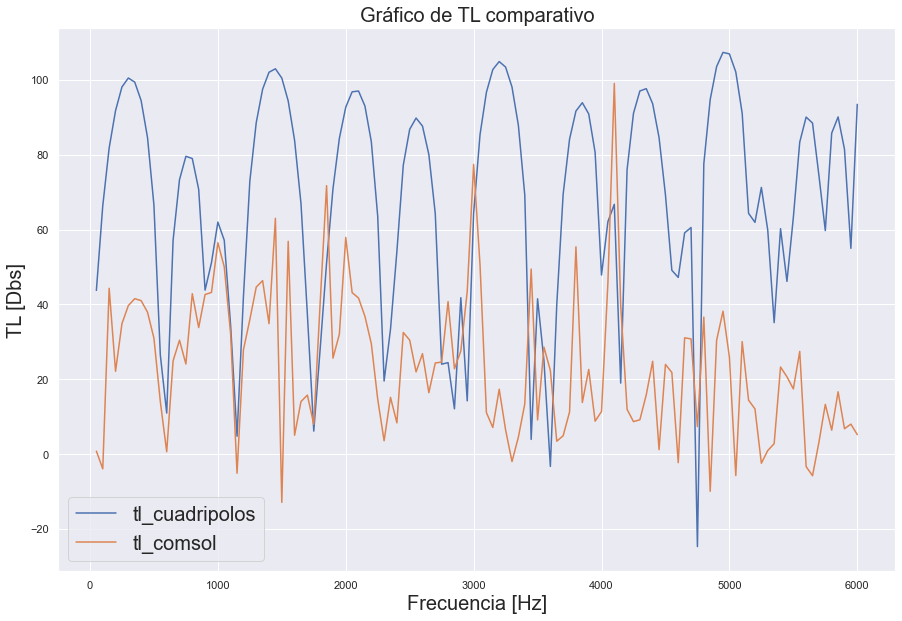

[[1.         0.05777206]
 [0.05777206 1.        ]]


In [95]:
x = np.arange(50,6050,50)
y_silenciador = silenciador_total.tl_(x) 
y_comsol = tl_comsol['tl']
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(x, y_silenciador, label = 'tl_cuadripolos')
ax.plot(tl_comsol['frequency'], y_comsol, label = 'tl_comsol')
ax.set(xlabel='Frecuencia [Hz]', ylabel='TL [Dbs]',
       title='Gráfico de TL comparativo')
ax.legend(loc = 'best')
plt.show()
print(np.corrcoef(y_silenciador, y_comsol))
#fig.savefig('cuadripolos_plots/grafico_tl_comparativo_extension_resonador.png')

## silenciador 2

- 1 Cámara de expansión
- 2 tubo
- 3 Cámara de expansión 
- 4 
 - 4.1 Extensión expansión
 - 4.2 Tubo cerrado

In [96]:
#tubo cerrado
tubo_cerrado_l = 0.19
tubo_cerrado_s = np.pi*0.125*0.6
tubo_cerrado_s1 = np.pi*(0.02**2)

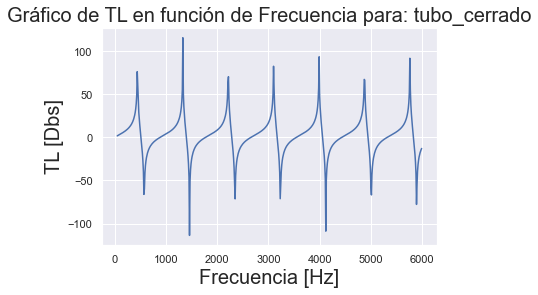

In [97]:
tubo_cerrado = Cuadripolo(tubo_cerrado_s, tubo_cerrado_l, s1 = tubo_cerrado_s1, tipo = 'tubo_cerrado')
tubo_cerrado.coeficientes()
tubo_cerrado.obtencion_tl()
tubo_cerrado.plot_tl()

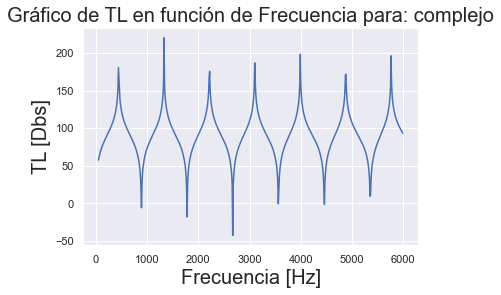

In [98]:
#tubo cerrado x extension 
tubo_extension = expansion_extension * tubo_cerrado 
tubo_extension.s2 = tubo_extension.s1 = np.pi * 0.02 ** 2 
tubo_extension.cuadri
tubo_extension.obtencion_tl()
tubo_extension.plot_tl()

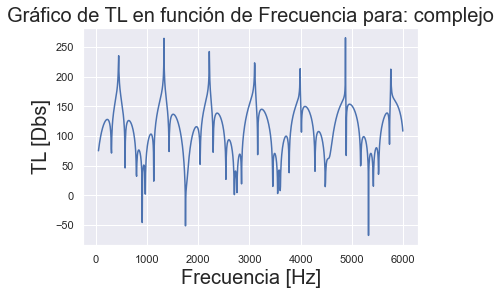

In [99]:
# total 
silenciador_total_2 = camara * tubo * camara_3 * tubo_extension
silenciador_total_2.s1 = np.pi * (0.02 ** 2)
silenciador_total_2.s2 = np.pi * (0.02 ** 2)
silenciador_total_2.obtencion_tl()
silenciador_total_2.plot_tl(values = np.arange(50, 6000, 5))

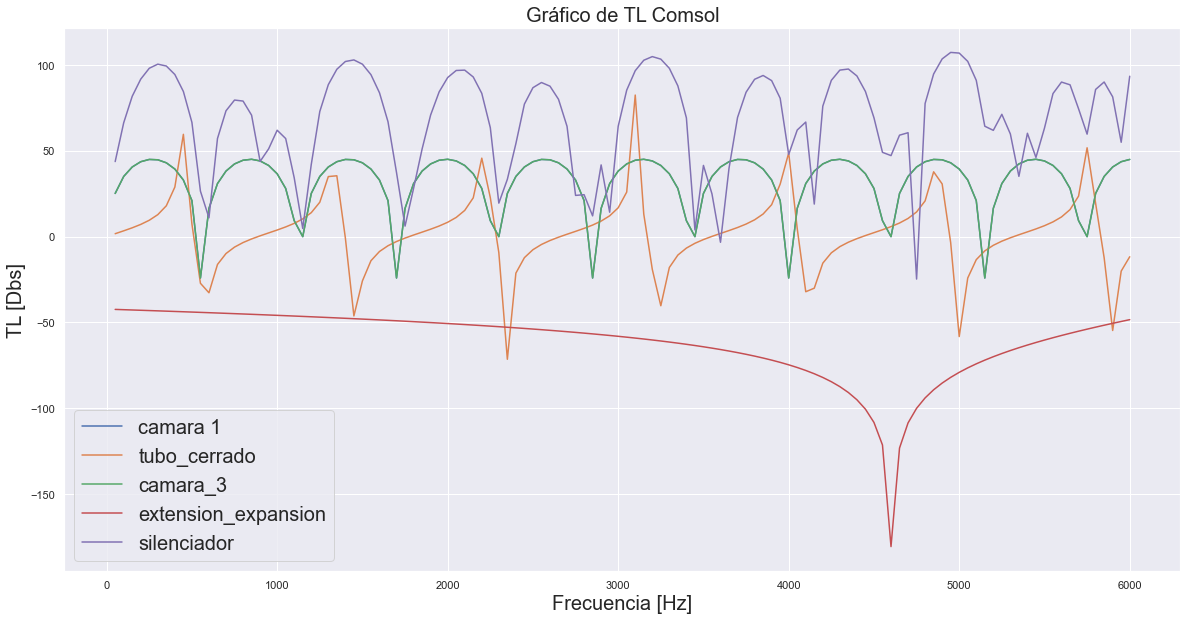

In [100]:
x = np.arange(50,6050,50)
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x, camara.tl_(x), label = 'camara 1')
ax.plot(x, tubo_cerrado.tl_(x), label = 'tubo_cerrado')
ax.plot(x, camara_3.tl_(x), label = 'camara_3')
ax.plot(x, expansion_extension.tl_(x), label = 'extension_expansion')
ax.plot(x, silenciador_total.tl_(x), label = 'silenciador')
ax.set(xlabel='Frecuencia [Hz]', ylabel='TL [Dbs]',
       title='Gráfico de TL Comsol')
ax.legend(loc = 'best')
plt.show()
#fig.savefig('cuadripolos_plots/suma_silenciadores_extension_tubo.png')

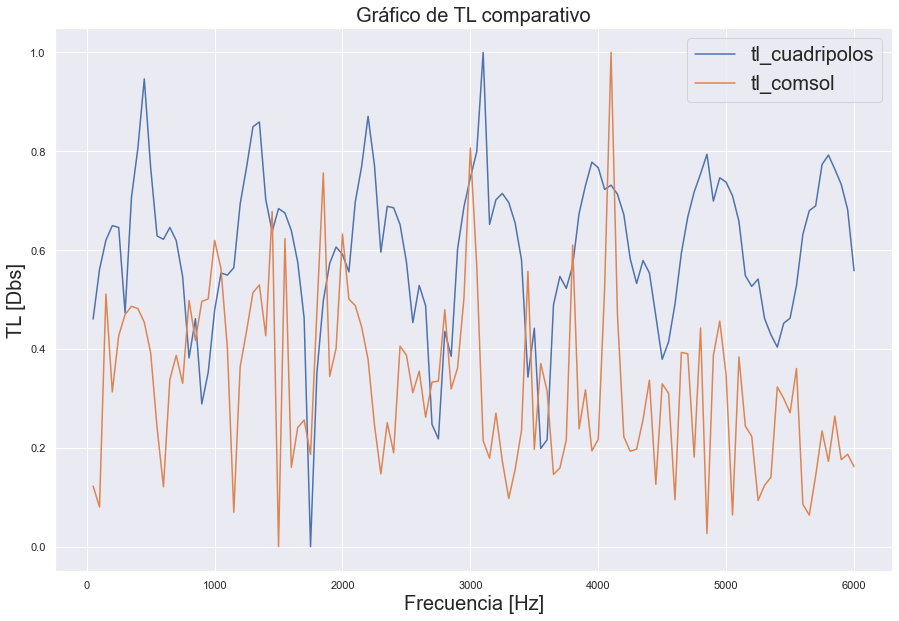

[[1.         0.04167809]
 [0.04167809 1.        ]]


In [101]:
x = np.arange(50,6050,50)
y_silenciador = min_max_scaler.fit_transform(silenciador_total_2.tl_(x).reshape(-1, 1))
y_comsol = min_max_scaler.fit_transform(tl_comsol['tl'].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(x, y_silenciador, label = 'tl_cuadripolos')
ax.plot(tl_comsol['frequency'], y_comsol, label = 'tl_comsol')
ax.set(xlabel='Frecuencia [Hz]', ylabel='TL [Dbs]',
       title='Gráfico de TL comparativo')
ax.legend(loc = 'best')
plt.show()
print(np.corrcoef(y_silenciador.reshape(1, -1), y_comsol.reshape(1, -1)))
#fig.savefig('cuadripolos_plots/grafico_tl_comparativo_extension_cerrado.png')

## silenciador 3:
- 1 Cámara de expansión
- 2 tubo
- 3 Cámara de expansión 
- 4 
 - 4.1 tubo cerrado
 - 4.2 tubo cerrado

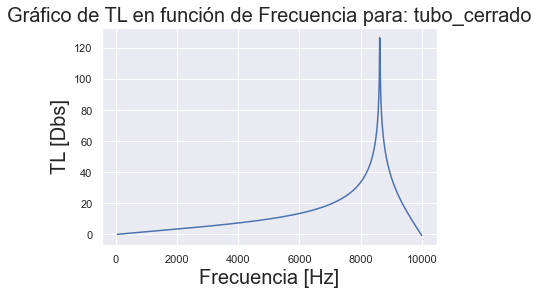

In [102]:
tubo_cerrado_remplazo = Cuadripolo(s=np.pi*(0.02**2), largo=0.01, tipo ='tubo_cerrado')
tubo_cerrado_remplazo.coeficientes()
tubo_cerrado_remplazo.obtencion_tl()
tubo_cerrado_remplazo.plot_tl(values = np.arange(50,10000,10))

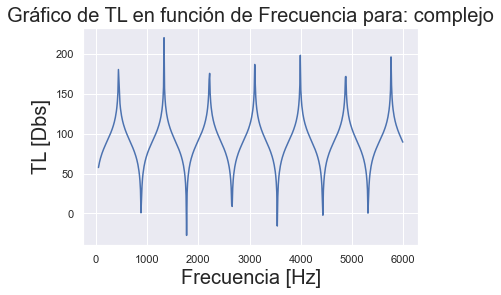

In [103]:
#tubo cerrado x tubo cerrado 
tubo_tubo = tubo_cerrado_remplazo * tubo_cerrado 
tubo_tubo.s2 = tubo_tubo.s1 = np.pi * 0.02 ** 2 
tubo_tubo.cuadri
tubo_tubo.obtencion_tl()
tubo_tubo.plot_tl()

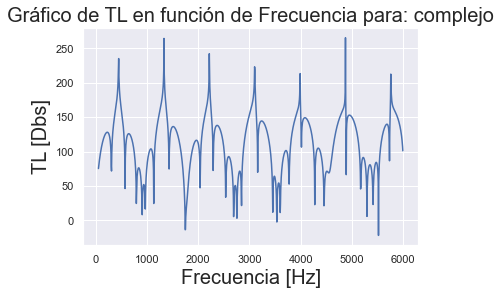

In [104]:
# total 
silenciador_total_3 = camara * tubo * camara_3 * tubo_tubo
silenciador_total_3.s1 = np.pi * (0.02 ** 2)
silenciador_total_3.s2 = np.pi * (0.02 ** 2)
silenciador_total_3.obtencion_tl()
silenciador_total_3.plot_tl(values = np.arange(50, 6000, 5))

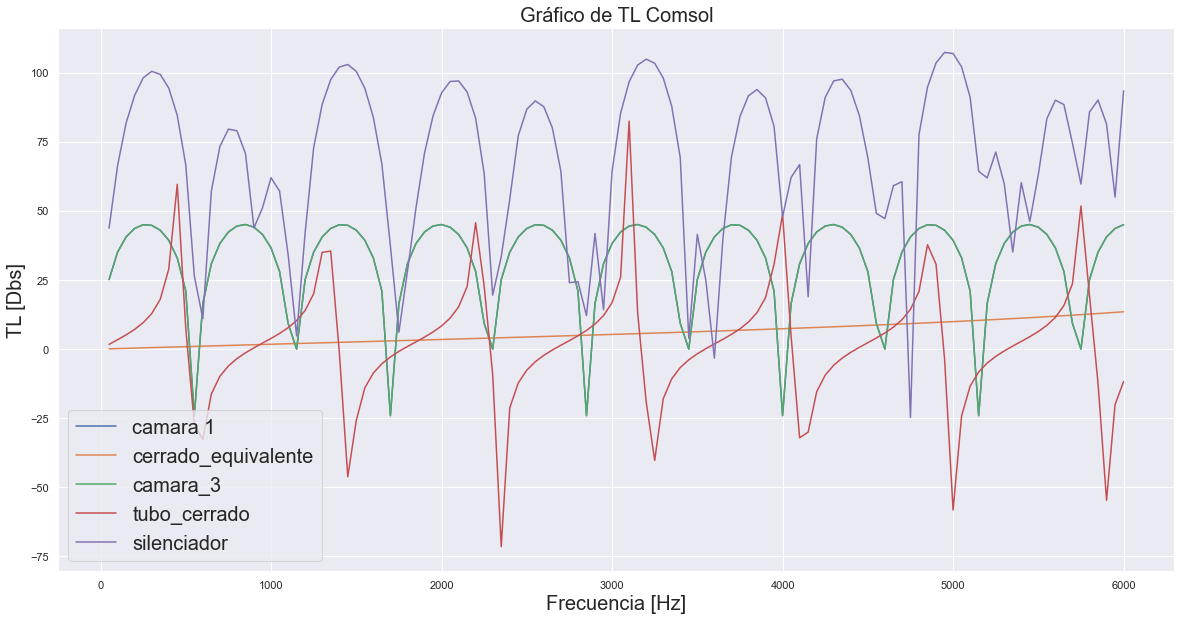

In [106]:
x = np.arange(50,6050,50)
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x, camara.tl_(x), label = 'camara 1')
ax.plot(x, tubo_cerrado_remplazo.tl_(x), label = 'cerrado_equivalente')
ax.plot(x, camara_3.tl_(x), label = 'camara_3')
ax.plot(x, tubo_cerrado.tl_(x), label = 'tubo_cerrado')
ax.plot(x, silenciador_total.tl_(x), label = 'silenciador')
ax.set(xlabel='Frecuencia [Hz]', ylabel='TL [Dbs]',
       title='Gráfico de TL Comsol')
ax.legend(loc = 'best')
plt.show()
#fig.savefig('cuadripolos_plots/suma_silenciadores_tubo_tubo.png')

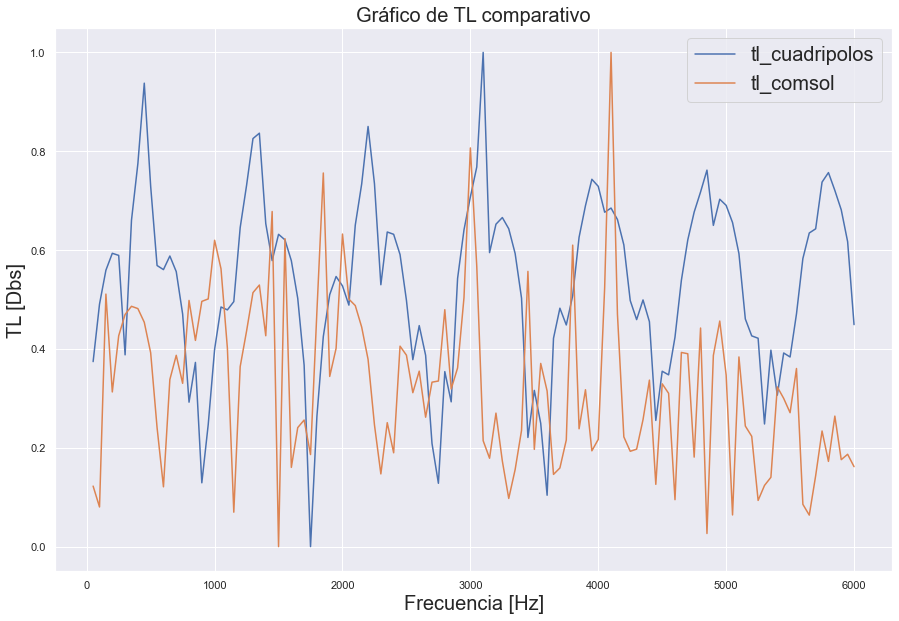

[[1.         0.05810064]
 [0.05810064 1.        ]]


In [107]:
x = np.arange(50,6050,50)
y_silenciador = min_max_scaler.fit_transform(silenciador_total_3.tl_(x).reshape(-1, 1))
y_comsol = min_max_scaler.fit_transform(tl_comsol['tl'].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(x, y_silenciador, label = 'tl_cuadripolos')
ax.plot(tl_comsol['frequency'], y_comsol, label = 'tl_comsol')
ax.set(xlabel='Frecuencia [Hz]', ylabel='TL [Dbs]',
       title='Gráfico de TL comparativo')
ax.legend(loc = 'best')
plt.show()
print(np.corrcoef(y_silenciador.reshape(1, -1), y_comsol.reshape(1, -1)))
#fig.savefig('cuadripolos_plots/grafico_tl_comparativo_cerrado_cerrado.png')

## silenciador 4:
- 1 Cámara de expansión
- 2 tubo
- 3 Cámara de expansión 
- 4 
 - 4.1 tubo cerrado
 - 4.2 resonador

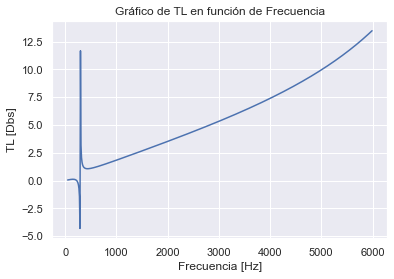

In [31]:
#tubo cerrado x extension 
tubo_reso = tubo_cerrado_remplazo * reso
tubo_reso.s2 = tubo_reso.s1 = np.pi * 0.02 ** 2 
tubo_reso.cuadri
tubo_reso.obtencion_tl()
tubo_reso.plot_tl()

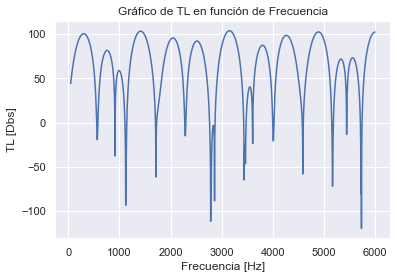

In [32]:
# total 
silenciador_total_4 = camara * tubo * camara_3 * tubo_reso
silenciador_total_4.s1 = np.pi * (0.02 ** 2)
silenciador_total_4.s2 = np.pi * (0.02 ** 2)
silenciador_total_4.obtencion_tl()
silenciador_total_4.plot_tl(values = np.arange(50, 6000, 5))

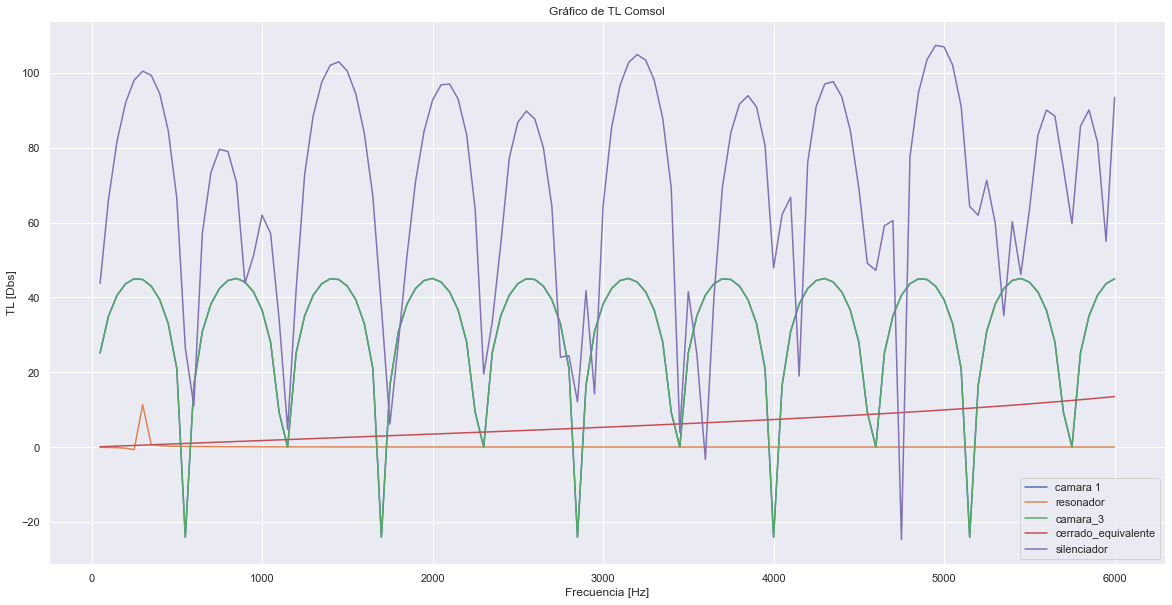

In [48]:
x = np.arange(50,6050,50)
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x, camara.tl_(x), label = 'camara 1')
ax.plot(x, reso.tl_(x), label = 'resonador')
ax.plot(x, camara_3.tl_(x), label = 'camara_3')
ax.plot(x, tubo_cerrado_remplazo.tl_(x), label = 'cerrado_equivalente')
ax.plot(x, silenciador_total.tl_(x), label = 'silenciador')
ax.set(xlabel='Frecuencia [Hz]', ylabel='TL [Dbs]',
       title='Gráfico de TL Comsol')
ax.legend(loc = 'best')
plt.show()
#fig.savefig('cuadripolos_plots/suma_silenciadores_tubo_reso.png')

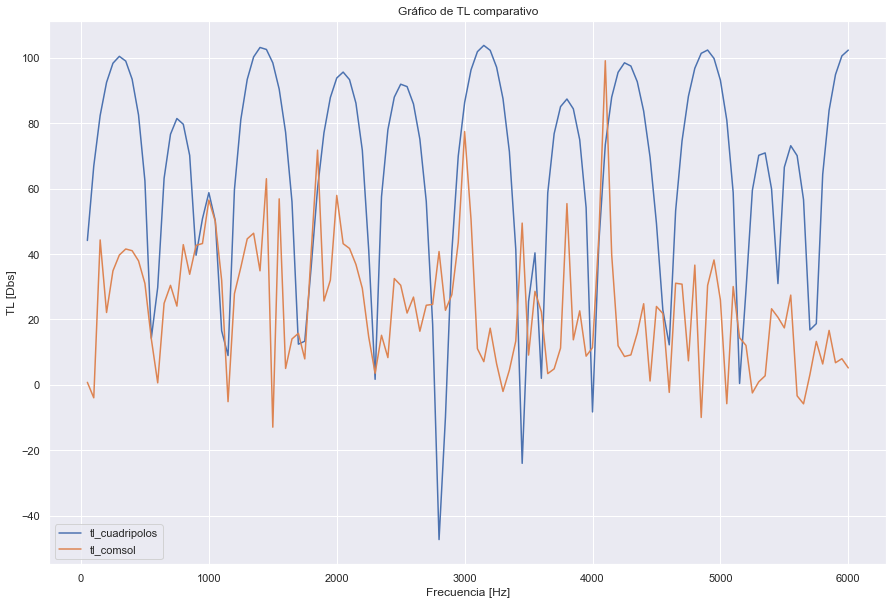

[[1.         0.13042507]
 [0.13042507 1.        ]]


In [38]:
x = np.arange(50,6050,50)
y_silenciador = silenciador_total_4.tl_(x) 
y_comsol = tl_comsol['tl']
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(x, y_silenciador, label = 'tl_cuadripolos')
ax.plot(tl_comsol['frequency'], y_comsol, label = 'tl_comsol')
ax.set(xlabel='Frecuencia [Hz]', ylabel='TL [Dbs]',
       title='Gráfico de TL comparativo')
ax.legend(loc = 'best')
plt.show()
print(np.corrcoef(y_silenciador, y_comsol))
#fig.savefig('cuadripolos_plots/grafico_tl_comparativo_cerrado_resonador.png')